In [1]:
import numpy as np
import pandas as pd
import igraph as ig

config = pd.read_csv('config.csv')
TMAX=config['TMAX'][0]
tick=config['data_tick'][0]
distribution=str(config['food_dis'][0])
times=int(TMAX/tick)

results_folder='Clustering_results/'
def find_index(array, element):
	result = np.where(array == element)
	if result[0].size > 0:
		return result[0][0]
	else:
		return -1

def find_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def load_centroids(times):
	centroid_list=[]
	for i in range(times):
		time=i*tick
		centroids=np.loadtxt(results_folder+f"centroids_{distribution}_{time}.csv",delimiter=',')
		centroid_list.append(centroids)

	return centroid_list


def find_ancestor(centroid,prev_centroids):
	distances=[]
	for ancestor in prev_centroids:
		distance=find_distance(centroid,ancestor)
		distances.append(distance)

	return np.argmin(distances)



In [2]:
centroid_list=load_centroids(times)
original_centers=centroid_list[0]
prev_centroids=original_centers

In [3]:
# node_index={}
Graph = ig.Graph()

for time in range(times):
	centroids=centroid_list[time]
	
	ii=0

	for centroid in centroids:
		node=f"{time}_{ii}"
		Graph.add_vertex(node)
		if time>0:
			ancestor=find_ancestor(centroid,prev_centroids)
			ancestor_node=f"{time-1}_{ancestor}"
			Graph.add_edge(node,ancestor_node)
			print(ancestor_node,node)
		ii+=1
	prev_centroids=centroids

	


0_2 1_0
0_3 1_1
0_0 1_2
0_1 1_3
0_2 1_4
0_3 1_5
0_1 1_6
0_3 1_7
0_1 1_8
1_3 2_0
1_2 2_1
1_5 2_2
1_4 2_3
1_8 2_4
1_3 2_5
1_2 2_6
1_7 2_7
1_1 2_8
2_5 3_0
2_6 3_1
2_2 3_2
2_0 3_3
2_4 3_4
2_5 3_5
2_1 3_6
2_3 3_7
3_5 4_0
3_2 4_1
3_1 4_2
3_3 4_3
3_6 4_4
3_5 4_5
3_0 4_6
3_4 4_7
3_3 4_8
4_8 5_0
4_1 5_1
4_0 5_2
4_2 5_3
4_7 5_4
4_4 5_5
4_3 5_6
4_6 5_7
4_5 5_8
5_6 6_0
5_1 6_1
5_8 6_2
5_3 6_3
5_5 6_4
6_1 7_0
6_3 7_1
6_2 7_2
7_1 8_0
7_0 8_1
7_2 8_2
8_0 9_0
8_1 9_1
8_2 9_2


In [24]:
components = Graph.connected_components()
i=0
subgraphs=[]
layouts = []
for component in components:
	i+=1
	# print(component)
	subgraph = Graph.subgraph(component)
	subgraphs.append(subgraph)
	layout = subgraph.layout_reingold_tilford(mode="in", root=[0])
	layouts.append(layout)
	ig.plot(subgraph, layout=layout, vertex_label=subgraph.vs["name"],target=f'subgraph_{i}.png')


[1. 9.]
[5. 9.]
[1. 3.]
[2. 9.]


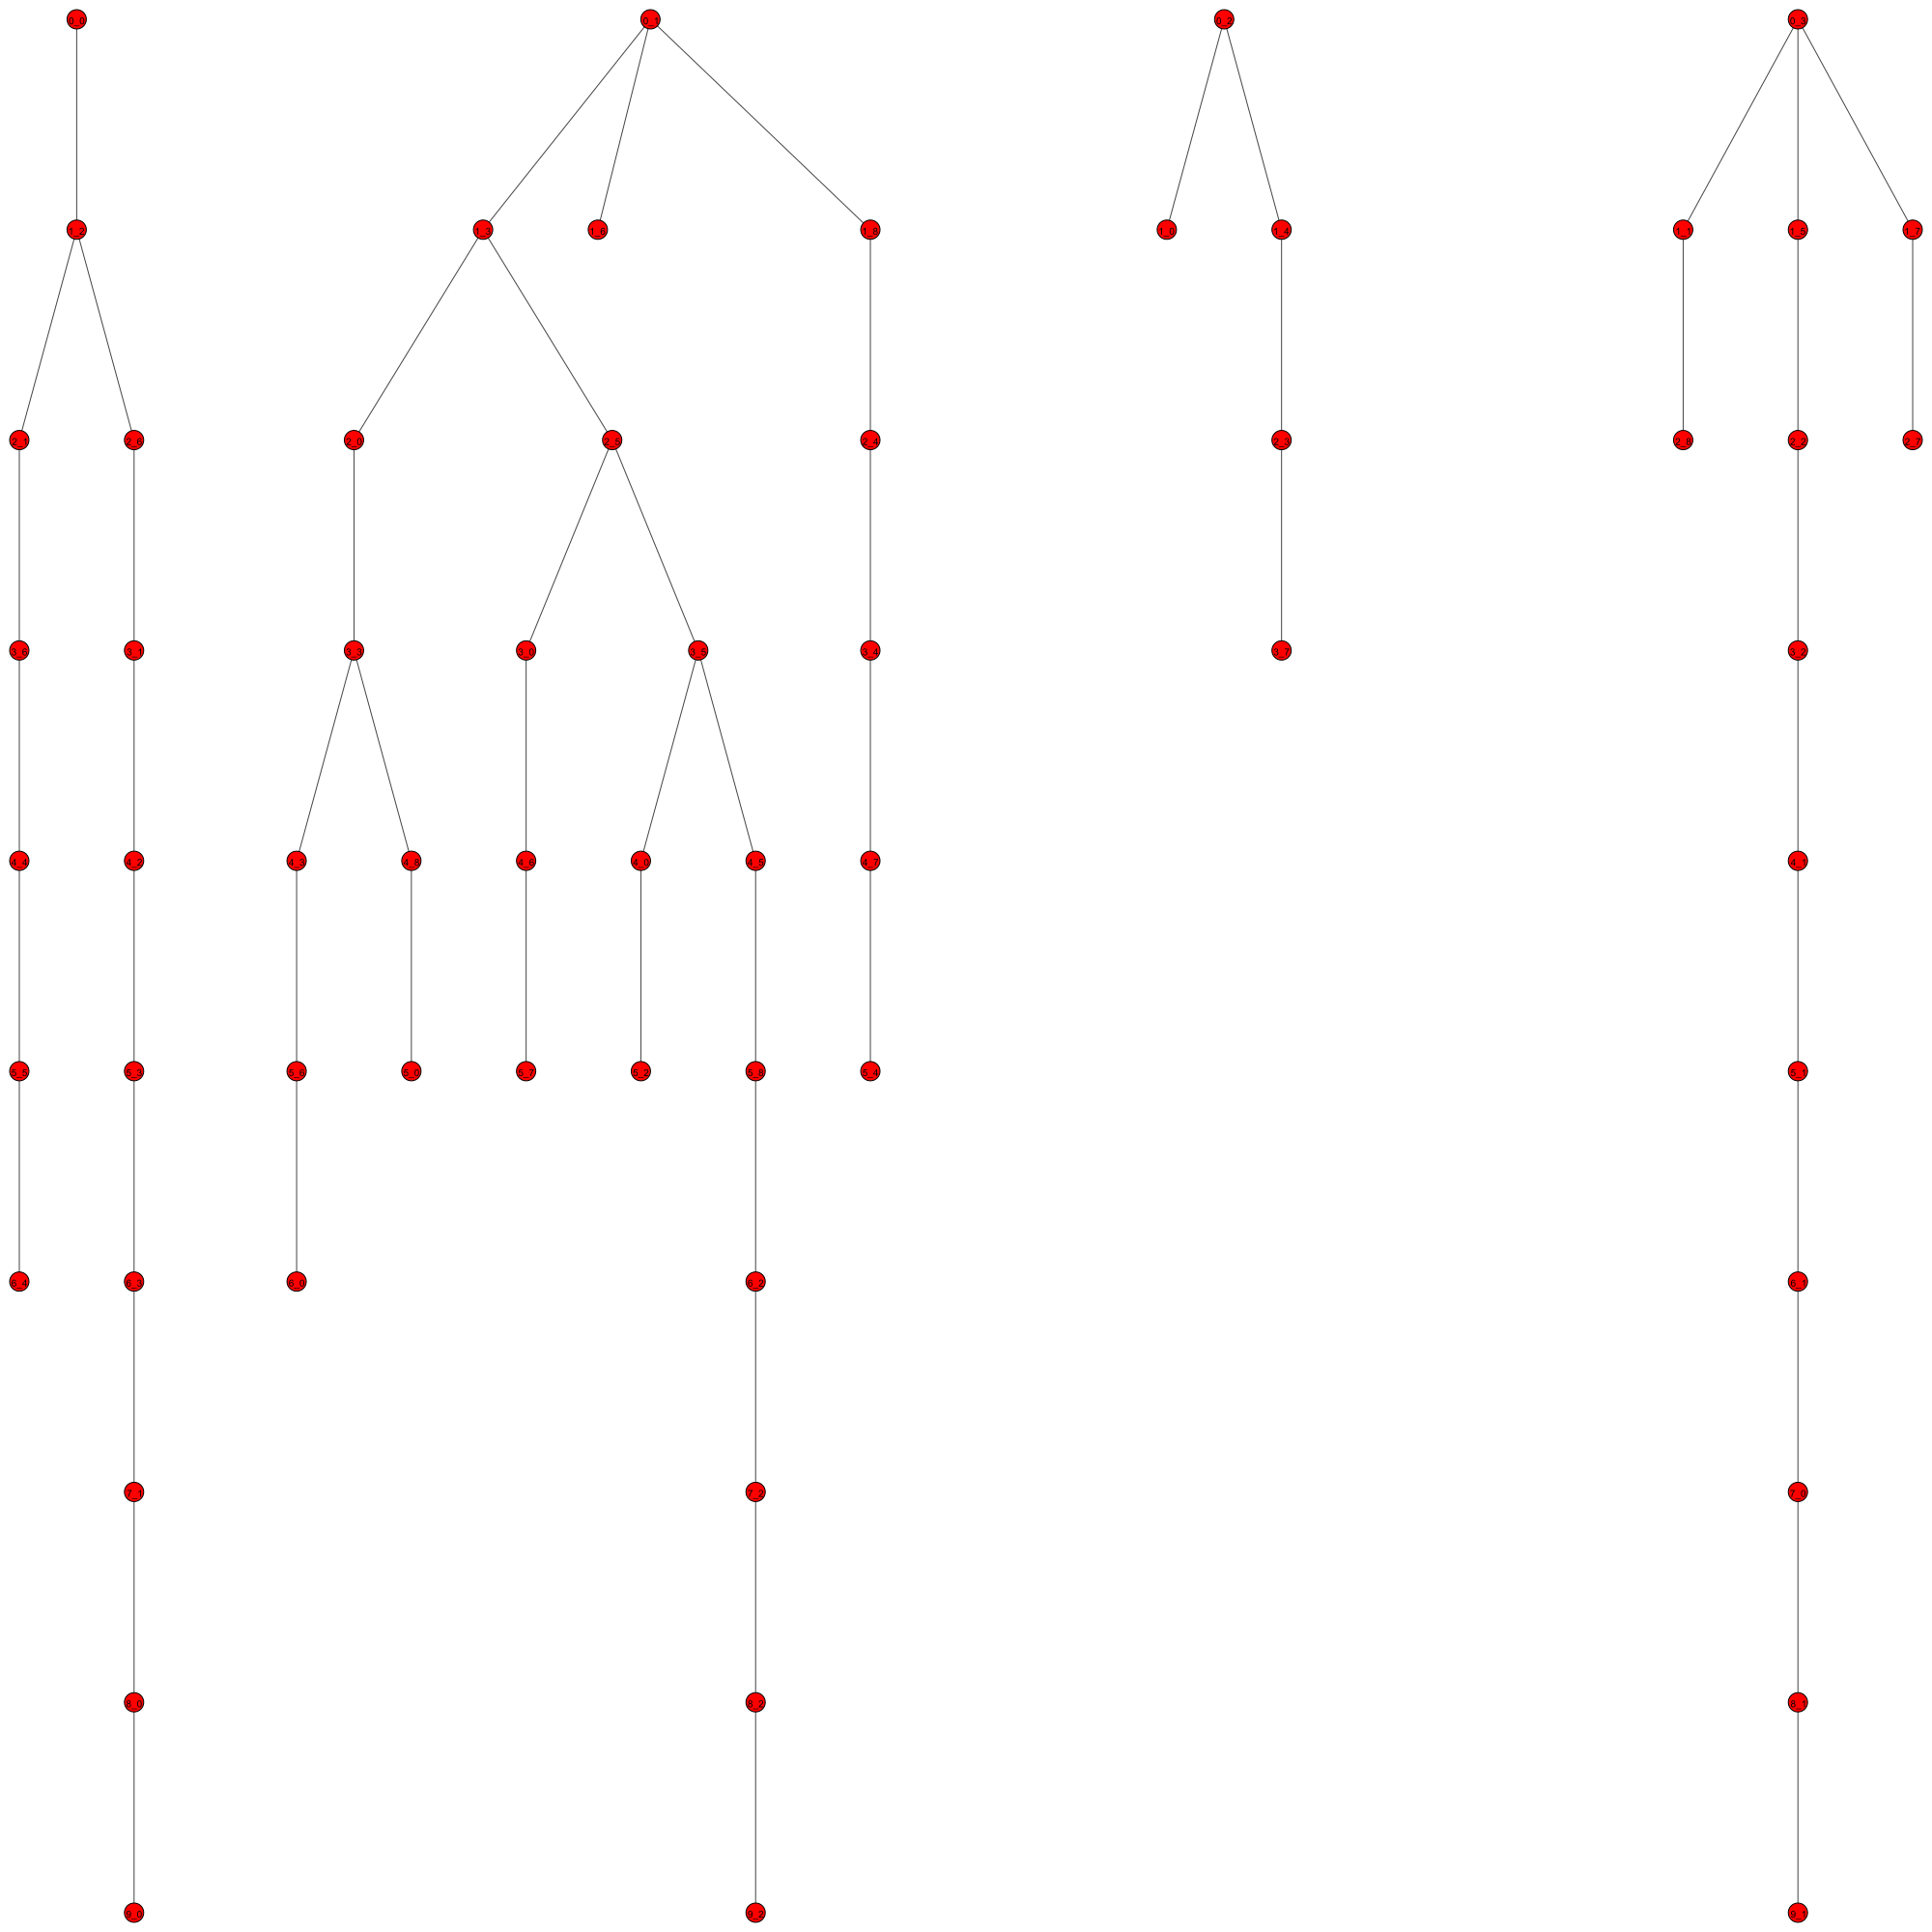

In [44]:



sizes = [(np.array([coord for coord in layout]), np.ptp(layout, axis=0)) for layout in layouts]

translation = np.array([0, 0],dtype='float64')

translated_layouts = []

for layout, size in sizes:
    print(size)
    
    translation_width = 0*size[0] + 5
    translation += np.array([translation_width, 0], dtype='float64')
    translated_layout = layout + translation
    translated_layouts.append(translated_layout)

combined_layout = np.concatenate(translated_layouts)

combined_graph = ig.Graph().disjoint_union(subgraphs)





vertex_labels = combined_graph.vs['name']
# Plot the graph using the combined layout
plot_size = (2000, 2000)

margin = 50  # adjust this value as needed

# Rescale the layout to fit within the plot size
x, y = np.array(combined_layout).T
x = (x - np.min(x)) / (np.max(x) - np.min(x)) * (plot_size[0] - 2 * margin) + margin
y = (y - np.min(y)) / (np.max(y) - np.min(y)) * (plot_size[1] - 2 * margin) + margin
rescaled_layout = list(zip(x, y))

scale=1
ig.plot(
    	combined_graph, layout=rescaled_layout, 
        vertex_label=vertex_labels,
        vertex_label_size=10*scale,
        vertex_size=20*scale,
        bbox=plot_size,
        target='combined.png'

		)
